<a href="https://colab.research.google.com/github/Mr-S-Mirzoev/ML-Data/blob/main/lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторно-конкурсная работа 3. Композиции алгоритмов. Ранжирование.

Данная работа состоит из двух этапов: лабораторного и конкурсного. Для обоих используется один и тот же набор данных, который вы можете найти в описании первого конкурсного задания на kaggle.

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

Наиболее предпочтительный подход к решению «лабоконкурса» - проделать предлагаемые лабораторные задания, а затем приступить к участию в конкурсном этапе. Это позволит вам перед участием в конкурсе познакомиться с представленными данными, освоить полезные приемы для улучшения качества, получить бейзлайн решение и глубже вникнуть в суть темы. 

Однако, мы не запрещаем вам выполнить только один из двух этапов: вы можете проделать лабораторные исследования и не участвовать в конкурсе или же пропустить лабораторную часть и сразу заняться соревновательной.

Мы не предоставляем код бейзлайн решения конкурса. Идеи для бейзлайна вы можете почерпнуть из заданий лабораторной части.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

Преодоление medium baseline на kaggle дает вам 5 баллов за конкурс. Если вы выполните задания из лабораторной, то пробить medium baseline для вас не составит труда.

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_02.ipynb.

### Preloading

In [1]:
%%bash

[ -d "test_data/task3" ] || (mkdir -p test_data/task3 && unzip zip/competition-2-shad-fall-2018.zip -d test_data/task3)

In [2]:
%cd test_data/task3

/home/mirzoev/extracurriculum/Yandex-Data-Analysis-School/ML-Tasks/test_data/task3


In [3]:
%%bash

ls -al

total 445272
drwxrwxr-x 4 mirzoev mirzoev      4096 мая 15 14:05 .
drwxrwxr-x 4 mirzoev mirzoev      4096 мая 13 18:28 ..
drwxrwxr-x 2 mirzoev mirzoev      4096 мая 14 12:39 .ipynb_checkpoints
-rw-r--r-- 1 mirzoev mirzoev 170566642 окт 29  2017 test_clicks_information.json
-rw-rw-r-- 1 mirzoev mirzoev   2145018 дек  1  2019 test.csv
drwxrwxr-x 3 mirzoev mirzoev      4096 мая 15 14:05 test_data
-rw-r--r-- 1 mirzoev mirzoev  29889433 окт 29  2017 test_org_information.json
-rw-r--r-- 1 mirzoev mirzoev   9795149 окт 29  2017 test_rubric_information.json
-rw-r--r-- 1 mirzoev mirzoev 170914592 окт 17  2017 train_clicks_information.json
-rw-rw-r-- 1 mirzoev mirzoev   4360995 дек  1  2019 train.csv
-rw-r--r-- 1 mirzoev mirzoev  57726717 окт 17  2017 train_org_information.json
-rw-r--r-- 1 mirzoev mirzoev  10513420 окт 17  2017 train_rubric_information.json


In [4]:
%%bash
ls ../../test_data/task3
for name in $(ls *.zip); do
    echo "Unziping and removing source $name" ;
    unzip $name ;
    rm $name
done

test_clicks_information.json
test.csv
test_data
test_org_information.json
test_rubric_information.json
train_clicks_information.json
train.csv
train_org_information.json
train_rubric_information.json


ls: cannot access '*.zip': No such file or directory


In [5]:
%%bash

rm -rf MACOSX/ __MACOSX/
ls

test_clicks_information.json
test.csv
test_data
test_org_information.json
test_rubric_information.json
train_clicks_information.json
train.csv
train_org_information.json
train_rubric_information.json


**(2 балла) Задание 1.** Загрузите данные о запросах и их релевантности (*train.csv*, *test.csv*), а также информацию об организациях (*train_org_information.json*, *test_org_information.json*) и рубриках (*train_rubric_information.json*, *test_rubric_information.json*)

Для дальнейших экспериментов необходимо посчитать небольшой набор базовых факторов. С использованием информации о запросах и организациях, посчитайте факторы, которые на ваш взгляд будут полезными для предсказания релевантности.

Примерами текстовых факторов могут служить:
 - кол-во слов в запросе и названии организации;
 - пословные/N-граммные пересечения слов запроса и названия организации (также можно использовать синонимы названия организации и адрес организации): кол-во слов в пересечении, [мера Жаккара](https://en.wikipedia.org/wiki/Jaccard_index) и пр.;
 - кол-во различных синонимичных названий организации (поле *names* в описании организации);
 - One-hot-encoded язык запроса.
 
По информации о географическом положении:
 - факт совпадения региона, где задавался запрос и региона организации;
 - координаты показанной области;
 - размеры показанной области;
 - меры, характеризующие близость координат организации к показанному окну: расстояние до центра области и другие.
 
Факторы, описывающие организацию:
 - one-hot-encoding фактор cтраны или региона организации (важно: не используйте one-hot-encoding факторы, в которых больше 10 значений; если в факторе слишком много значений, ограничьтесь, например, только самыми популярными категориями)
 - кол-во рабочих дней в неделе и общая продолжительность работы (поле *work_intervals* в описании организации)
 - кол-во рубрик (поле *rubrics* в описании организации)
 
![](https://miro.medium.com/max/1500/0*FwubnnoNlt6Coo9j.png)

В этом задании не нужно использовать многомерные представления текстовой информации (tfidf и прочие embeddings) и информацию о кликах (*train_clicks_information.json*, *test_clicks_information.json*). Придумывать сверхсложные факторы тоже необязательно.

Вы можете реализовать описанные выше факторы и/или придумать свои. Для экспериментов в лабораторной - достаточно реализовать предложенное, для победы в конкурсе - вряд ли. Но зачастую такие простые признаки могут приносить наибольшую пользу.

В итоге у вас должно получиться от 15 до 50 факторов, характеризующих запрос и организацию и покрывающих основные источники данных (кроме кликов). Это наш основной датасет, который будет использоваться в экспериментах.

**Важно**: До раздела *«Ранжирование»* будем считать, **что решается задача *регрессии* (предсказываем абсолютное значение релевантности)**.

In [6]:
import pandas as pd

test_df = pd.read_csv (r'test.csv')
test_df.head()

,query_id,query,region,org_name,org_id,window_center,window_size
0,20396,"""Агентство «Созвездие недвижимости предлагает ...",225,Железногорское Агентство недвижимости,1249145086,"99.505405,61.698653","171.643239,40.700127"
1,7344,ATM,108058,QNB Finansbank ATM,1187253652,"30.783271,40.397587","0.003431,0.003942"
2,17757,oto yıkama,11508,Elit Oto Yıkama & Kuafor,1195278147,"29.180056,41.016730","0.054920,0.059811"
3,8870,ресторан,213,Кафе Разные люди,1064538352,"37.425925,55.887505","0.080681,0.039410"
4,13055,банки,213,"Совкомбанк, отделение",1130294660,"37.633948,55.779017","0.022815,0.014827"


In [7]:
train_df = pd.read_csv (r'train.csv')
train_df

,query_id,query,region,org_name,org_id,window_center,window_size,relevance
0,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Суд Жовтневого району міста Дніпропетровськ,1021049127,"34.613119,48.506531","0.025928,0.017380",0.00
1,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Дніпропетровський окружний адміністративний суд,1602348889,"34.613119,48.506531","0.025928,0.017380",0.00
2,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Бабушкінський районний суд,1105837793,"34.613119,48.506531","0.025928,0.017380",0.00
3,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Красногвардійський районний суд,1066267658,"34.613119,48.506531","0.025928,0.017380",0.00
4,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Жовтневий суд,1661586235,"34.613119,48.506531","0.025928,0.017380",0.00
...,...,...,...,...,...,...,...,...
29269,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский морской собор ...,1697104071,"21.229930,54.754365","3.402144,1.063102",0.06
29270,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский Морской Собор,1118533048,"21.229930,54.754365","3.402144,1.063102",0.06
29271,36337,• Кафедральный собор,10857,"Кафедральный Собор, офис",1129636340,"21.229930,54.754365","3.402144,1.063102",0.15
29272,36337,• Кафедральный собор,10857,Кафедральный собор Христа Спасителя,1675621522,"21.229930,54.754365","3.402144,1.063102",0.15


In [8]:
test_org_info_df = pd.read_json(r'test_org_information.json', orient='index', convert_axes=True)
test_org_info_df.reset_index(inplace=True)
test_org_info_df["index"] = (test_org_info_df["index"] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1ms')
test_org_info_df.set_index('index', inplace=True)
test_org_info_df.index.name = None
test_org_info_df = test_org_info_df.transpose()
test_org_info_df.head()

,1001979904,1776877570,1119059971,1190264840,1736114187,1092943885,1191968787,1228996631,1238695962,1219264540,...,1034715132,1130889194,1797778087,1094418412,1078039890,1731133424,1329304915,1095603540,1004601340,98077635246
names,"[{'value': {'locale': 'tr', 'value': 'Camlik I...","[{'value': {'locale': 'en', 'value': 'Strakhov...","[{'value': {'locale': 'en', 'value': 'Mariysky...","[{'value': {'locale': 'en', 'value': 'Detskaya...","[{'value': {'locale': 'en', 'value': 'Amursky ...","[{'value': {'locale': 'en', 'value': 'Neftmagi...","[{'value': {'locale': 'en', 'value': 'Novosibi...","[{'value': {'locale': 'tr', 'value': 'Safir Ot...","[{'value': {'locale': 'tr', 'value': 'Capa Ilk...","[{'value': {'locale': 'en', 'value': 'Turfirma...",...,"[{'value': {'locale': 'en', 'value': 'TeploEle...","[{'value': {'locale': 'en', 'value': 'FGAOU Vy...","[{'value': {'locale': 'en', 'value': 'Mar-An'}...","[{'value': {'locale': 'en', 'value': 'MBDOU De...","[{'value': {'locale': 'en', 'value': 'Infoflot...","[{'value': {'locale': 'en', 'value': 'Studiya ...","[{'value': {'locale': 'en', 'value': 'MAO FKS ...","[{'value': {'locale': 'en', 'value': 'Nedorogo...","[{'value': {'locale': 'en', 'value': 'RosEvroB...","[{'value': {'locale': 'ru', 'value': 'ММП Мисн..."
rubrics,"[30903, 31663]","[30364, 30365, 30366, 30412]","[30166, 30177, 30181]",[30057],[30309],[20271],[30309],[30785],"[30703, 31663]","[30793, 30794, 30795]",...,[30991],"[30777, 31580]",[30774],[30903],"[30765, 30794]",[30211],[31098],"[31278, 144152359]",[30336],[31564]
work_intervals,[],"[{'time_minutes_begin': 0, 'day': 'everyday', ...","[{'time_minutes_begin': 660, 'day': 'tuesday',...","[{'time_minutes_begin': 540, 'day': 'saturday'...","[{'time_minutes_begin': 480, 'day': 'weekdays'...","[{'time_minutes_begin': 0, 'day': 'everyday', ...","[{'time_minutes_begin': 540, 'day': 'weekdays'...",[],[],"[{'time_minutes_begin': 600, 'day': 'saturday'...",...,"[{'time_minutes_begin': 540, 'day': 'weekdays'...","[{'time_minutes_begin': 480, 'day': 'weekdays'...","[{'time_minutes_begin': 720, 'day': 'everyday'...","[{'time_minutes_begin': 420, 'day': 'weekdays'...","[{'time_minutes_begin': 540, 'day': 'weekdays'...","[{'time_minutes_begin': 600, 'day': 'everyday'...","[{'time_minutes_begin': 960, 'day': 'monday', ...","[{'time_minutes_begin': 0, 'day': 'everyday', ...","[{'time_minutes_begin': 480, 'day': 'everyday'...","[{'time_minutes_begin': 540, 'day': 'weekdays'..."
address,"{'region_code': 'TR', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'TR', 'formatted': {'locale': ...","{'region_code': 'TR', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...",...,"{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ..."


In [9]:
train_org_info_df = pd.read_json(r'train_org_information.json', orient='index', convert_axes=True)
train_org_info_df.reset_index(inplace=True)
train_org_info_df["index"] = (train_org_info_df["index"] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1ms')
train_org_info_df.set_index('index', inplace=True)
train_org_info_df.index.name = None
train_org_info_df = train_org_info_df.transpose()
train_org_info_df.head()

,1255014404,1111883782,39713767434,1336016908,149331116064,1273080496,1027997732,1010303013,1076887591,1220280361,...,1396812343,51283886027,1707999191,1755185118,122417293989,1010040812,1009516530,1397897875,1061370235,1027473401
names,"[{'value': {'locale': 'en', 'value': 'Bely Bok...","[{'value': {'locale': 'en', 'value': 'Vyborgsk...","[{'value': {'locale': 'en', 'value': 'Sberbank...","[{'value': {'locale': 'en', 'value': 'Filial b...","[{'value': {'locale': 'ru', 'value': 'Школа'}}]","[{'value': {'locale': 'en', 'value': 'Nedvizhi...","[{'value': {'locale': 'en', 'value': 'Demir Ho...","[{'value': {'locale': 'en', 'value': 'Zavod so...","[{'value': {'locale': 'en', 'value': 'Redaktsi...","[{'value': {'locale': 'en', 'value': 'Cassetta...",...,"[{'value': {'locale': 'en', 'value': 'Rosgosst...","[{'value': {'locale': 'en', 'value': 'Peyntbol...","[{'value': {'locale': 'en', 'value': 'Gorodska...","[{'value': {'locale': 'ru', 'value': 'Магазин ...","[{'value': {'locale': 'ru', 'value': 'Проспект...","[{'value': {'locale': 'en', 'value': 'Restoran...","[{'value': {'locale': 'en', 'value': 'Gtk Suzd...","[{'value': {'locale': 'en', 'value': 'Rukodeln...","[{'value': {'locale': 'en', 'value': 'Turkan D...","[{'value': {'locale': 'en', 'value': 'Kreativ ..."
rubrics,"[20277, 20679, 21237]",[30723],[30348],"[30057, 30111, 30114]",[30723],[31094],[30785],"[30478, 30587, 31083]","[30926, 31036]","[30762, 30770, 30776, 31286]",...,[30348],[30937],[30142],"[31342, 31628]",[3491649170],"[30776, 30785]","[30066, 30774, 30776, 30785, 30788]","[31404, 31462, 31507, 31524, 31595]","[30723, 31663]","[30209, 30210]"
work_intervals,"[{'time_minutes_begin': 540, 'day': 'everyday'...","[{'time_minutes_begin': 510, 'day': 'saturday'...","[{'time_minutes_begin': 570, 'day': 'saturday'...","[{'time_minutes_begin': 480, 'day': 'saturday'...",[],"[{'time_minutes_begin': 540, 'day': 'weekdays'...",[],"[{'time_minutes_begin': 540, 'day': 'weekdays'...","[{'time_minutes_begin': 540, 'day': 'weekdays'...",[],...,"[{'time_minutes_begin': 600, 'day': 'saturday'...","[{'time_minutes_begin': 540, 'day': 'everyday'...","[{'time_minutes_begin': 0, 'day': 'everyday', ...","[{'time_minutes_begin': 600, 'day': 'weekdays'...","[{'time_minutes_begin': 0, 'day': 'everyday', ...","[{'time_minutes_begin': 0, 'day': 'everyday', ...","[{'time_minutes_begin': 0, 'day': 'everyday', ...","[{'time_minutes_begin': 480, 'day': 'tuesday',...",[],[]
address,"{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'TR', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'TR', 'formatted': {'locale': ...",...,"{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'UA', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ...","{'region_code': 'UA', 'formatted': {'locale': ...","{'region_code': 'TR', 'formatted': {'locale': ...","{'region_code': 'RU', 'formatted': {'locale': ..."


In [10]:
train_rubric_information_df = pd.read_json(r'train_rubric_information.json').transpose()
train_rubric_information_df.head()

,keywords,phrases,descriptions,names
273147906,"[{'locale': 'ru', 'value': 'велосипед парковка...","[{'locale': 'de', 'value': 'Parkplatz für Fahr...","[{'value': {'locale': 'tr', 'value': 'Bisiklet...","[{'locale': 'en', 'value': 'Bicycle stand'}, {..."
30723,"[{'locale': 'tr', 'value': 'liseler, ortaokul,...","[{'locale': 'de', 'value': 'Bildungseinrichtun...","[{'value': {'locale': 'tr', 'value': 'Çocuklar...","[{'locale': 'de', 'value': 'Allgemeinbildende ..."
30724,"[{'locale': 'tr', 'value': 'arastırma, bilim, ...","[{'locale': 'tr', 'value': 'Bilim Arastırma En...","[{'value': {'locale': 'tr', 'value': 'Bilim ar...","[{'locale': 'tr', 'value': 'Bilim Araştırma En..."
30725,"[{'locale': 'tr', 'value': 'eğitim kontrol'}]","[{'locale': 'en', 'value': 'Board of Education...","[{'value': {'locale': 'tr', 'value': 'Eğitim k...","[{'locale': 'it', 'value': 'Amministrazione de..."
30731,"[{'locale': 'ru', 'value': 'Новые технологии -...","[{'locale': 'en', 'value': 'implementation of ...","[{'value': {'locale': 'tr', 'value': 'Nanotekn...","[{'locale': 'de', 'value': 'Innovative Technol..."


In [11]:
test_rubric_information_df = pd.read_json(r'test_rubric_information.json').transpose()
test_rubric_information_df.head()

,keywords,phrases,descriptions,names
273147906,"[{'locale': 'ru', 'value': 'велосипед парковка...","[{'locale': 'de', 'value': 'Parkplatz für Fahr...","[{'value': {'locale': 'tr', 'value': 'Bisiklet...","[{'locale': 'en', 'value': 'Bicycle stand'}, {..."
30723,"[{'locale': 'tr', 'value': 'liseler, ortaokul,...","[{'locale': 'de', 'value': 'Bildungseinrichtun...","[{'value': {'locale': 'tr', 'value': 'Çocuklar...","[{'locale': 'de', 'value': 'Allgemeinbildende ..."
30724,"[{'locale': 'tr', 'value': 'arastırma, bilim, ...","[{'locale': 'tr', 'value': 'Bilim Arastırma En...","[{'value': {'locale': 'tr', 'value': 'Bilim ar...","[{'locale': 'tr', 'value': 'Bilim Araştırma En..."
30725,"[{'locale': 'tr', 'value': 'eğitim kontrol'}]","[{'locale': 'en', 'value': 'Board of Education...","[{'value': {'locale': 'tr', 'value': 'Eğitim k...","[{'locale': 'it', 'value': 'Amministrazione de..."
30731,"[{'locale': 'ru', 'value': 'Новые технологии -...","[{'locale': 'en', 'value': 'implementation of ...","[{'value': {'locale': 'tr', 'value': 'Nanotekn...","[{'locale': 'de', 'value': 'Innovative Technol..."


In [12]:
import numpy as np

df_train = train_df.copy()

def get_word_count(s):
    return len(s.split())

df_train["word_count"] = np.vectorize(get_word_count)(df_train["query"])
df_train.tail()

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count
29269,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский морской собор ...,1697104071,"21.229930,54.754365","3.402144,1.063102",0.06,3
29270,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский Морской Собор,1118533048,"21.229930,54.754365","3.402144,1.063102",0.06,3
29271,36337,• Кафедральный собор,10857,"Кафедральный Собор, офис",1129636340,"21.229930,54.754365","3.402144,1.063102",0.15,3
29272,36337,• Кафедральный собор,10857,Кафедральный собор Христа Спасителя,1675621522,"21.229930,54.754365","3.402144,1.063102",0.15,3
29273,36337,• Кафедральный собор,10857,Кафедральный собор,1129616424,"21.229930,54.754365","3.402144,1.063102",0.35,3


In [13]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
    
df_train["querry_and_result_similarity"] = np.vectorize(similar)(df_train["org_name"], df_train["query"])
df_train

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count,querry_and_result_similarity
0,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Суд Жовтневого району міста Дніпропетровськ,1021049127,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.379310
1,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Дніпропетровський окружний адміністративний суд,1602348889,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.366667
2,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Бабушкінський районний суд,1105837793,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.262626
3,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Красногвардійський районний суд,1066267658,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.307692
4,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Жовтневий суд,1661586235,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.209302
...,...,...,...,...,...,...,...,...,...,...
29269,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский морской собор ...,1697104071,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.433735
29270,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский Морской Собор,1118533048,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.553846
29271,36337,• Кафедральный собор,10857,"Кафедральный Собор, офис",1129636340,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.772727
29272,36337,• Кафедральный собор,10857,Кафедральный собор Христа Спасителя,1675621522,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.654545


#### Organisation JSON intraspection

In [14]:
df_train["org_json"] = np.vectorize(lambda x: train_org_info_df[x])(df_train["org_id"])
df_train["org_json"][0]

names             [{'value': {'locale': 'en', 'value': 'Sud Zhov...
rubrics                                                     [30316]
work_intervals    [{'time_minutes_begin': 540, 'day': 'monday', ...
address           {'region_code': 'UA', 'formatted': {'locale': ...
Name: 1021049127, dtype: object

In [15]:
df_train["org_json"][0]["names"]

[{'value': {'locale': 'en',
   'value': 'Sud Zhovtnevogo rayona goroda Dnepropetrovsk'}},
 {'value': {'locale': 'ru',
   'value': 'Суд Жовтневого района города Днепропетровск'}},
 {'value': {'locale': 'uk', 'value': 'Суд Жовтневого району'}},
 {'value': {'locale': 'uk',
   'value': 'Суд Жовтневого району міста Дніпропетровськ'}},
 {'value': {'locale': 'ru', 'value': 'Суд Октябрского района'}}]

In [16]:
df_train["org_json"][0]["work_intervals"]

[{'time_minutes_begin': 540, 'day': 'monday', 'time_minutes_end': 780},
 {'time_minutes_begin': 825, 'day': 'monday', 'time_minutes_end': 1080},
 {'time_minutes_begin': 540, 'day': 'tuesday', 'time_minutes_end': 780},
 {'time_minutes_begin': 825, 'day': 'tuesday', 'time_minutes_end': 1080},
 {'time_minutes_begin': 540, 'day': 'wednesday', 'time_minutes_end': 780},
 {'time_minutes_begin': 825, 'day': 'wednesday', 'time_minutes_end': 1080},
 {'time_minutes_begin': 540, 'day': 'thursday', 'time_minutes_end': 780},
 {'time_minutes_begin': 825, 'day': 'thursday', 'time_minutes_end': 1080},
 {'time_minutes_begin': 540, 'day': 'friday', 'time_minutes_end': 780},
 {'time_minutes_begin': 825, 'day': 'friday', 'time_minutes_end': 1005}]

In [17]:
df_train["org_json"][0]["address"]

{'region_code': 'UA',
 'formatted': {'locale': 'ru',
  'value': 'Днепропетровская обл., Днепр г., ул. Паторжинского, 18а'},
 'pos': {'type': 'Point', 'coordinates': [35.053575, 48.456644]},
 'geo_id': 141}

#### Obtain "region_code"

In [18]:
df_train["region_code"] = np.vectorize(lambda x: x["address"]["region_code"])(df_train["org_json"])
grouped = df_train[["org_name", "region_code"]].groupby('region_code').agg(['count'])["org_name"]
grouped = grouped.sort_values('count', ascending=False)
CATS_QUANTITY = 5
top_cats = list(grouped.reset_index()["region_code"][:CATS_QUANTITY])
top_cats

['RU', 'TR', 'UA', 'BY', 'FR']

In [19]:
top_cats_encoded = {top_cats[i] : 1 << (i + 1) for i in range(CATS_QUANTITY)}
REGION_CODE_ONE_HOT_DEFAULT = 1
top_cats_encoded

{'RU': 2, 'TR': 4, 'UA': 8, 'BY': 16, 'FR': 32}

In [20]:
df_train["region_code_encoded"] = np.vectorize(lambda x: top_cats_encoded.setdefault(x, REGION_CODE_ONE_HOT_DEFAULT))(df_train["region_code"])
df_train[df_train["region_code_encoded"]==1]

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count,querry_and_result_similarity,org_json,region_code,region_code_encoded
3015,2070,свадебные салоны,162,Ana Leoni celebration,1117208072,"76.943776,43.295904","1.001816,0.367972",0.07,2,0.054054,"names [{'value': {'locale': 'en', ...",KZ,1
3016,2070,свадебные салоны,162,Casablanca,1014545860,"76.943776,43.295904","1.001816,0.367972",0.14,2,0.000000,"names [{'value': {'locale': 'ru', ...",KZ,1
3017,2070,свадебные салоны,162,Азия,1114610359,"76.943776,43.295904","1.001816,0.367972",0.14,2,0.000000,"names [{'value': {'locale': 'en', ...",KZ,1
3018,2070,свадебные салоны,162,Свадебный салон Mon Amour,1110259861,"76.943776,43.295904","1.001816,0.367972",0.14,2,0.634146,"names [{'value': {'locale': 'en', ...",KZ,1
3019,2070,свадебные салоны,162,Салон свадебной и вечерней моды RiAna,1060646208,"76.943776,43.295904","1.001816,0.367972",0.14,2,0.377358,"names [{'value': {'locale': 'en', ...",KZ,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28555,35477,храм гроба господня,2,Троицкий собор,1577863644,"35.230841,31.776338","0.008079,0.003826",0.00,3,0.303030,"names [{'value': {'locale': 'ru', ...",IL,1
28557,35477,храм гроба господня,2,Храм гроба Господня,1658972975,"35.230841,31.776338","0.008079,0.003826",0.50,3,0.894737,"names [{'value': {'locale': 'en', ...",IL,1
28729,35757,читинская государственная медицинская академия,65,Медицинский университет Астана,116364640838,"82.920430,55.030199","0.408761,0.398741",0.00,4,0.236842,"names [{'value': {'locale': 'ru', ...",KZ,1
29023,36043,школа-интернат мгу имени м.в ломоносова для од...,10748,Школа-интернат для Одаренных Детей,222632595431,"37.847155,56.010428","0.166907,0.103979",0.00,8,0.666667,"names [{'value': {'locale': 'ru', ...",KZ,1


#### Obtain "same_region"

In [21]:
df_train["org_json"][0]["address"]

{'region_code': 'UA',
 'formatted': {'locale': 'ru',
  'value': 'Днепропетровская обл., Днепр г., ул. Паторжинского, 18а'},
 'pos': {'type': 'Point', 'coordinates': [35.053575, 48.456644]},
 'geo_id': 141}

In [22]:
def same_region(json, region):
    return json["address"]["geo_id"]==region
    
df_train["same_region"] = np.vectorize(same_region)(df_train["org_json"], df_train["region"])
df_train

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count,querry_and_result_similarity,org_json,region_code,region_code_encoded,same_region
0,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Суд Жовтневого району міста Дніпропетровськ,1021049127,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.379310,"names [{'value': {'locale': 'en', ...",UA,8,False
1,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Дніпропетровський окружний адміністративний суд,1602348889,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.366667,"names [{'value': {'locale': 'en', ...",UA,8,False
2,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Бабушкінський районний суд,1105837793,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.262626,"names [{'value': {'locale': 'en', ...",UA,8,False
3,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Красногвардійський районний суд,1066267658,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.307692,"names [{'value': {'locale': 'en', ...",UA,8,False
4,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Жовтневий суд,1661586235,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.209302,"names [{'value': {'locale': 'en', ...",UA,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский морской собор ...,1697104071,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.433735,"names [{'value': {'locale': 'en', ...",RU,2,False
29270,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский Морской Собор,1118533048,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.553846,"names [{'value': {'locale': 'en', ...",RU,2,False
29271,36337,• Кафедральный собор,10857,"Кафедральный Собор, офис",1129636340,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.772727,"names [{'value': {'locale': 'en', ...",RU,2,False
29272,36337,• Кафедральный собор,10857,Кафедральный собор Христа Спасителя,1675621522,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.654545,"names [{'value': {'locale': 'en', ...",RU,2,False


#### Obtain "area_coordinates"

In [23]:
def area_coordinates(center, size):
    splitted_center = center.split(',')
    splitted_size = size.split(',')
    x1 = float(splitted_center[1]) - (float(splitted_size[0]) / 2)
    y1 = float(splitted_center[0]) - (float(splitted_size[1]) / 2)
    x4 = float(splitted_center[1]) + (float(splitted_size[0]) / 2)
    y4 = float(splitted_center[0]) + (float(splitted_size[1]) / 2)
    return np.array([(x1, y1), (x4, y4)], dtype=tuple)
    
df_train["area_coordinates"] = np.vectorize(area_coordinates)(df_train["window_center"], df_train["window_size"])
df_train

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count,querry_and_result_similarity,org_json,region_code,region_code_encoded,same_region,area_coordinates
0,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Суд Жовтневого району міста Дніпропетровськ,1021049127,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.379310,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48..."
1,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Дніпропетровський окружний адміністративний суд,1602348889,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.366667,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48..."
2,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Бабушкінський районний суд,1105837793,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.262626,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48..."
3,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Красногвардійський районний суд,1066267658,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.307692,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48..."
4,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Жовтневий суд,1661586235,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.209302,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский морской собор ...,1697104071,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.433735,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]"
29270,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский Морской Собор,1118533048,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.553846,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]"
29271,36337,• Кафедральный собор,10857,"Кафедральный Собор, офис",1129636340,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.772727,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]"
29272,36337,• Кафедральный собор,10857,Кафедральный собор Христа Спасителя,1675621522,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.654545,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]"


#### Obtain "area_size"

In [24]:
df_train["area_size"] = np.vectorize(lambda x: float(x.split(',')[0])*float(x.split(',')[1]))(df_train["window_size"])
df_train

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count,querry_and_result_similarity,org_json,region_code,region_code_encoded,same_region,area_coordinates,area_size
0,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Суд Жовтневого району міста Дніпропетровськ,1021049127,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.379310,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451
1,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Дніпропетровський окружний адміністративний суд,1602348889,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.366667,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451
2,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Бабушкінський районний суд,1105837793,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.262626,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451
3,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Красногвардійський районний суд,1066267658,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.307692,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451
4,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Жовтневий суд,1661586235,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.209302,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский морской собор ...,1697104071,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.433735,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826
29270,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский Морской Собор,1118533048,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.553846,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826
29271,36337,• Кафедральный собор,10857,"Кафедральный Собор, офис",1129636340,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.772727,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826
29272,36337,• Кафедральный собор,10857,Кафедральный собор Христа Спасителя,1675621522,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.654545,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826


#### Obtain "distance"

In [25]:
df_train["org_json"][0]['address']['pos']['coordinates']

[35.053575, 48.456644]

In [26]:
import math

def dist_by_org_id(org_json, window_center):
    x1 = org_json['address']['pos']['coordinates'][0]
    x2 = float(window_center.split(',')[0])
    y1 = org_json['address']['pos']['coordinates'][1]
    y2 = float(window_center.split(',')[1])
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

df_train["distance"] = np.vectorize(dist_by_org_id)(df_train["org_json"],df_train["window_center"])
df_train

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count,querry_and_result_similarity,org_json,region_code,region_code_encoded,same_region,area_coordinates,area_size,distance
0,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Суд Жовтневого району міста Дніпропетровськ,1021049127,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.379310,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.443272
1,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Дніпропетровський окружний адміністративний суд,1602348889,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.366667,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.399923
2,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Бабушкінський районний суд,1105837793,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.262626,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.435877
3,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Красногвардійський районний суд,1066267658,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.307692,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.397661
4,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Жовтневий суд,1661586235,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.209302,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.443338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский морской собор ...,1697104071,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.433735,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,1.343166
29270,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский Морской Собор,1118533048,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.553846,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,1.342292
29271,36337,• Кафедральный собор,10857,"Кафедральный Собор, офис",1129636340,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.772727,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,0.729987
29272,36337,• Кафедральный собор,10857,Кафедральный собор Христа Спасителя,1675621522,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.654545,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,0.727451


#### Obtain "synonims_count"

In [27]:
df_train["synonims_count"] = np.vectorize(lambda x: len(x["names"]))(df_train["org_json"])
df_train

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count,querry_and_result_similarity,org_json,region_code,region_code_encoded,same_region,area_coordinates,area_size,distance,synonims_count
0,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Суд Жовтневого району міста Дніпропетровськ,1021049127,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.379310,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.443272,5
1,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Дніпропетровський окружний адміністративний суд,1602348889,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.366667,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.399923,5
2,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Бабушкінський районний суд,1105837793,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.262626,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.435877,7
3,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Красногвардійський районний суд,1066267658,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.307692,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.397661,7
4,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Жовтневий суд,1661586235,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.209302,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.443338,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский морской собор ...,1697104071,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.433735,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,1.343166,4
29270,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский Морской Собор,1118533048,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.553846,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,1.342292,3
29271,36337,• Кафедральный собор,10857,"Кафедральный Собор, офис",1129636340,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.772727,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,0.729987,4
29272,36337,• Кафедральный собор,10857,Кафедральный собор Христа Спасителя,1675621522,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.654545,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,0.727451,5


#### Obtain "request_lang"

In [28]:
from langid import classify as get_lang

df_train["request_lang"] = np.vectorize(lambda x: get_lang(x)[0])(df_train["query"])
df_train

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count,querry_and_result_similarity,org_json,region_code,region_code_encoded,same_region,area_coordinates,area_size,distance,synonims_count,request_lang
0,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Суд Жовтневого району міста Дніпропетровськ,1021049127,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.379310,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.443272,5,ru
1,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Дніпропетровський окружний адміністративний суд,1602348889,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.366667,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.399923,5,ru
2,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Бабушкінський районний суд,1105837793,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.262626,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.435877,7,ru
3,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Красногвардійський районний суд,1066267658,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.307692,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.397661,7,ru
4,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Жовтневий суд,1661586235,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.209302,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.443338,3,ru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский морской собор ...,1697104071,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.433735,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,1.343166,4,ru
29270,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский Морской Собор,1118533048,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.553846,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,1.342292,3,ru
29271,36337,• Кафедральный собор,10857,"Кафедральный Собор, офис",1129636340,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.772727,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,0.729987,4,ru
29272,36337,• Кафедральный собор,10857,Кафедральный собор Христа Спасителя,1675621522,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.654545,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,0.727451,5,ru


In [29]:
grouped = df_train[["org_name", "request_lang"]].groupby('request_lang').agg(['count'])["org_name"]
grouped = grouped.sort_values('count', ascending=False)
LANG_CATS_QUANTITY = 7
top_cats = list(grouped.reset_index()["request_lang"][:LANG_CATS_QUANTITY])
top_cats

['ru', 'bg', 'be', 'uk', 'en', 'sr', 'it']

In [30]:
top_cats_encoded = {top_cats[i] : 1 << (i + 1) for i in range(LANG_CATS_QUANTITY)}
REGION_CODE_ONE_HOT_DEFAULT = 1
top_cats_encoded

{'ru': 2, 'bg': 4, 'be': 8, 'uk': 16, 'en': 32, 'sr': 64, 'it': 128}

In [31]:
df_train["request_lang_encoded"] = np.vectorize(lambda x: top_cats_encoded.setdefault(x, REGION_CODE_ONE_HOT_DEFAULT))(df_train["request_lang"])
df_train[df_train["request_lang_encoded"]==1]

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count,querry_and_result_similarity,org_json,region_code,region_code_encoded,same_region,area_coordinates,area_size,distance,synonims_count,request_lang,request_lang_encoded
1053,742,цирк,187,Національний цирк України,1037098182,"31.115718,52.023064","6.643724,3.484482",0.00,1,0.275862,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.701201999999995, 29.373477], [55.344926, ...",23.149937,1.694175,10,mk,1
1054,742,цирк,187,"Росгосцирк, Брянский государственный цирк",1114825577,"31.115718,52.023064","6.643724,3.484482",0.07,1,0.177778,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[48.701201999999995, 29.373477], [55.344926, ...",23.149937,3.479800,5,mk,1
1055,742,цирк,187,Гомельский Государственный Цирк УК ЗКК,1209266532,"31.115718,52.023064","6.643724,3.484482",0.14,1,0.142857,"names [{'value': {'locale': 'en', ...",BY,16,False,"[[48.701201999999995, 29.373477], [55.344926, ...",23.149937,0.424589,9,mk,1
1056,742,цирк,187,"Цирк Kobzov, головний офіс",1290917418,"31.115718,52.023064","6.643724,3.484482",0.14,1,0.200000,"names [{'value': {'locale': 'en', ...",UA,8,False,"[[48.701201999999995, 29.373477], [55.344926, ...",23.149937,1.697311,4,mk,1
1078,847,tokat devlet hastanesi,11508,Verem Savaş Dispanseri,1286217918,"28.962607,41.030693","1.013084,0.433221",0.00,3,0.409091,"names [{'value': {'locale': 'tr', ...",TR,4,False,"[[40.524150999999996, 28.745996499999997], [41...",0.438889,0.168905,4,nl,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,35958,школа 69 барнаул телефон,197,ГБОУ школа № 69,219477406102,"83.779875,53.348053","0.343147,0.228586",0.00,4,0.410256,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.1764795, 83.665582], [53.5196265, 83.8941...",0.078439,54.498639,6,kk,1
28950,35958,школа 69 барнаул телефон,197,Барнаул,1226517897,"83.779875,53.348053","0.343147,0.228586",0.00,4,0.387097,"names [{'value': {'locale': 'en', ...",RU,2,True,"[[53.1764795, 83.665582], [53.5196265, 83.8941...",0.078439,0.019020,4,kk,1
28951,35958,школа 69 барнаул телефон,197,МОУ СОШ № 69,1042792246,"83.779875,53.348053","0.343147,0.228586",0.00,4,0.166667,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.1764795, 83.665582], [53.5196265, 83.8941...",0.078439,46.447037,22,kk,1
28952,35958,школа 69 барнаул телефон,197,Гимназия им. героя Советского Союза В. В. Коле...,1079495409,"83.779875,53.348053","0.343147,0.228586",0.00,4,0.151899,"names [{'value': {'locale': 'en', ...",RU,2,False,"[[53.1764795, 83.665582], [53.5196265, 83.8941...",0.078439,46.350636,17,kk,1


#### Obtain "work_days_count" and "work_days_overall_hours"

In [32]:
"""
кол-во рабочих дней в неделе и общая продолжительность работы (поле work_intervals в описании организации)
кол-во рубрик (поле rubrics в описании организации)
"""
df_train["org_json"][0]["work_intervals"]

[{'time_minutes_begin': 540, 'day': 'monday', 'time_minutes_end': 780},
 {'time_minutes_begin': 825, 'day': 'monday', 'time_minutes_end': 1080},
 {'time_minutes_begin': 540, 'day': 'tuesday', 'time_minutes_end': 780},
 {'time_minutes_begin': 825, 'day': 'tuesday', 'time_minutes_end': 1080},
 {'time_minutes_begin': 540, 'day': 'wednesday', 'time_minutes_end': 780},
 {'time_minutes_begin': 825, 'day': 'wednesday', 'time_minutes_end': 1080},
 {'time_minutes_begin': 540, 'day': 'thursday', 'time_minutes_end': 780},
 {'time_minutes_begin': 825, 'day': 'thursday', 'time_minutes_end': 1080},
 {'time_minutes_begin': 540, 'day': 'friday', 'time_minutes_end': 780},
 {'time_minutes_begin': 825, 'day': 'friday', 'time_minutes_end': 1005}]

In [33]:
df_train["work_days_count"] = np.vectorize(lambda x:len(x["work_intervals"]) // 2)(df_train["org_json"])
df_train

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count,querry_and_result_similarity,...,region_code,region_code_encoded,same_region,area_coordinates,area_size,distance,synonims_count,request_lang,request_lang_encoded,work_days_count
0,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Суд Жовтневого району міста Дніпропетровськ,1021049127,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.379310,...,UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.443272,5,ru,2,5
1,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Дніпропетровський окружний адміністративний суд,1602348889,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.366667,...,UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.399923,5,ru,2,0
2,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Бабушкінський районний суд,1105837793,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.262626,...,UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.435877,7,ru,2,0
3,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Красногвардійський районний суд,1066267658,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.307692,...,UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.397661,7,ru,2,5
4,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Жовтневий суд,1661586235,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.209302,...,UA,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.443338,3,ru,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский морской собор ...,1697104071,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.433735,...,RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,1.343166,4,ru,2,0
29270,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский Морской Собор,1118533048,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.553846,...,RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,1.342292,3,ru,2,0
29271,36337,• Кафедральный собор,10857,"Кафедральный Собор, офис",1129636340,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.772727,...,RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,0.729987,4,ru,2,0
29272,36337,• Кафедральный собор,10857,Кафедральный собор Христа Спасителя,1675621522,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.654545,...,RU,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,0.727451,5,ru,2,0


In [34]:
def get_overall_working_hours(info):
    working_entry_h = 0
    for working_entry in info["work_intervals"]:
        working_entry_h += working_entry["time_minutes_end"] - working_entry["time_minutes_begin"]
    return working_entry_h // 60


df_train["work_days_overall_hours"] = np.vectorize(get_overall_working_hours)(df_train["org_json"])
df_train

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count,querry_and_result_similarity,...,region_code_encoded,same_region,area_coordinates,area_size,distance,synonims_count,request_lang,request_lang_encoded,work_days_count,work_days_overall_hours
0,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Суд Жовтневого району міста Дніпропетровськ,1021049127,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.379310,...,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.443272,5,ru,2,5,40
1,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Дніпропетровський окружний адміністративний суд,1602348889,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.366667,...,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.399923,5,ru,2,0,9
2,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Бабушкінський районний суд,1105837793,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.262626,...,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.435877,7,ru,2,0,8
3,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Красногвардійський районний суд,1066267658,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.307692,...,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.397661,7,ru,2,5,40
4,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Жовтневий суд,1661586235,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.209302,...,8,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.443338,3,ru,2,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский морской собор ...,1697104071,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.433735,...,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,1.343166,4,ru,2,0,9
29270,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский Морской Собор,1118533048,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.553846,...,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,1.342292,3,ru,2,0,0
29271,36337,• Кафедральный собор,10857,"Кафедральный Собор, офис",1129636340,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.772727,...,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,0.729987,4,ru,2,0,9
29272,36337,• Кафедральный собор,10857,Кафедральный собор Христа Спасителя,1675621522,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.654545,...,2,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,0.727451,5,ru,2,0,12


In [35]:
train_rubric_information_df = train_rubric_information_df.transpose()
train_rubric_information_df

,273147906,30723,30724,30725,30731,30733,30735,30738,30739,30740,...,30705,30706,30707,30709,30711,30712,30715,30717,30718,30719
keywords,"[{'locale': 'ru', 'value': 'велосипед парковка...","[{'locale': 'tr', 'value': 'liseler, ortaokul,...","[{'locale': 'tr', 'value': 'arastırma, bilim, ...","[{'locale': 'tr', 'value': 'eğitim kontrol'}]","[{'locale': 'ru', 'value': 'Новые технологии -...","[{'locale': 'tr', 'value': 'askeri, okullar, a...","[{'locale': 'tr', 'value': 'kuafor, meslek, ku...","[{'locale': 'tr', 'value': 'mesleki kurslar, m...","[{'locale': 'tr', 'value': 'Imam, hatip, kurum...","[{'locale': 'ru', 'value': 'Театральные учебны...",...,"[{'locale': 'tr', 'value': 'yurtdısında, egiti...","[{'locale': 'tr', 'value': 'ek, egitim'}, {'lo...","[{'locale': 'tr', 'value': 'banka, ekipmanları...","[{'locale': 'tr', 'value': 'satış, makineleri,...","[{'locale': 'tr', 'value': 'tartı, sistemleri,...","[{'locale': 'ru', 'value': 'Геологические науч...","[{'locale': 'tr', 'value': 'harita, muhendisli...","[{'locale': 'uk', 'value': 'Інститути підвищен...","[{'locale': 'tr', 'value': 'bilgisayar, kursla...","[{'locale': 'tr', 'value': 'dil, yabancı, kurs..."
phrases,"[{'locale': 'de', 'value': 'Parkplatz für Fahr...","[{'locale': 'de', 'value': 'Bildungseinrichtun...","[{'locale': 'tr', 'value': 'Bilim Arastırma En...","[{'locale': 'en', 'value': 'Board of Education...","[{'locale': 'en', 'value': 'implementation of ...","[{'locale': 'tr', 'value': 'askeri kurumlar'},...","[{'locale': 'en', 'value': 'Barber Schools'}, ...","[{'locale': 'fr', 'value': 'cours de formation...","[{'locale': 'tr', 'value': 'Imam hatip egitim ...","[{'locale': 'en', 'value': 'Acting Schools'}, ...",...,"[{'locale': 'tr', 'value': 'Yurtdısında egitim...","[{'locale': 'en', 'value': 'Educational Servic...","[{'locale': 'en', 'value': 'Bank Equipment'}, ...","[{'locale': 'tr', 'value': 'Satıs'}, {'locale'...","[{'locale': 'en', 'value': 'Scales'}, {'locale...","[{'locale': 'fr', 'value': 'conception'}, {'lo...","[{'locale': 'tr', 'value': 'Harita muhendislig...","[{'locale': 'de', 'value': 'Anstalten für Weit...","[{'locale': 'tr', 'value': 'Bilgisayar kurslar...","[{'locale': 'de', 'value': 'Abendkurse'}, {'lo..."
descriptions,"[{'value': {'locale': 'tr', 'value': 'Bisiklet...","[{'value': {'locale': 'tr', 'value': 'Çocuklar...","[{'value': {'locale': 'tr', 'value': 'Bilim ar...","[{'value': {'locale': 'tr', 'value': 'Eğitim k...","[{'value': {'locale': 'tr', 'value': 'Nanotekn...","[{'value': {'locale': 'tr', 'value': 'Askeri k...","[{'value': {'locale': 'tr', 'value': 'Kuaförle...","[{'value': {'locale': 'tr', 'value': 'Türlü al...","[{'value': {'locale': 'tr', 'value': 'Farklı d...","[{'value': {'locale': 'tr', 'value': 'Tiyatro ...",...,"[{'value': {'locale': 'tr', 'value': ''}}, {'v...","[{'value': {'locale': 'tr', 'value': 'Her türl...","[{'value': {'locale': 'tr', 'value': 'Banknotl...","[{'value': {'locale': 'tr', 'value': 'Gıda, iç...","[{'value': {'locale': 'tr', 'value': 'Ev ve sa...","[{'value': {'locale': 'tr', 'value': 'Uzmanlık...","[{'value': {'locale': 'tr', 'value': ' Analog ...","[{'value': {'locale': 'tr', 'value': 'Mesleğin...","[{'value': {'locale': 'tr', 'value': 'Temel ve...","[{'value': {'locale': 'tr', 'value': 'Tam zama..."
names,"[{'locale': 'en', 'value': 'Bicycle stand'}, {...","[{'locale': 'de', 'value': 'Allgemeinbildende ...","[{'locale': 'tr', 'value': 'Bilim Araştırma En...","[{'locale': 'it', 'value': 'Amministrazione de...","[{'locale': 'de', 'value': 'Innovative Technol...","[{'locale': 'tr', 'value': 'Askeri okullar'}, ...","[{'locale': 'fr', 'value': 'Formation des maît...","[{'locale': 'it', 'value': 'Corsi e workshop'}...","[{'locale': 'fr', 'value': 'Enseignement relig...","[{'locale': 'fr', 'value': 'Enseignement artis...",...,"[{'locale': 'de', 'value': 'Auslandsstudium'},...","[{'locale': 'tr', 'value': 'Ek eğitim'}, {'loc...","[{'locale': 'tr', 'value': 'Banka Ekipman Firm...","[{'locale': 'it', 'value':

In [36]:
test_rubric_information_df = test_rubric_information_df.transpose()
test_rubric_information_df

,273147906,30723,30724,30725,30731,30733,30735,30738,30739,30740,...,30703,30704,30705,30706,30711,30712,30714,30717,30718,30719
keywords,"[{'locale': 'ru', 'value': 'велосипед парковка...","[{'locale': 'tr', 'value': 'liseler, ortaokul,...","[{'locale': 'tr', 'value': 'arastırma, bilim, ...","[{'locale': 'tr', 'value': 'eğitim kontrol'}]","[{'locale': 'ru', 'value': 'Новые технологии -...","[{'locale': 'tr', 'value': 'askeri, okullar, a...","[{'locale': 'tr', 'value': 'kuafor, meslek, ku...","[{'locale': 'tr', 'value': 'mesleki kurslar, m...","[{'locale': 'tr', 'value': 'Imam, hatip, kurum...","[{'locale': 'ru', 'value': 'Театральные учебны...",...,"[{'locale': 'tr', 'value': 'eğitim, merkezleri...","[{'locale': 'ru', 'value': 'Учебно-производств...","[{'locale': 'tr', 'value': 'yurtdısında, egiti...","[{'locale': 'tr', 'value': 'ek, egitim'}, {'lo...","[{'locale': 'tr', 'value': 'tartı, sistemleri,...","[{'locale': 'ru', 'value': 'Геологические науч...","[{'locale': 'ru', 'value': 'Гидрометеорология ...","[{'locale': 'uk', 'value': 'Інститути підвищен...","[{'locale': 'tr', 'value': 'bilgisayar, kursla...","[{'locale': 'tr', 'value': 'dil, yabancı, kurs..."
phrases,"[{'locale': 'de', 'value': 'Parkplatz für Fahr...","[{'locale': 'de', 'value': 'Bildungseinrichtun...","[{'locale': 'tr', 'value': 'Bilim Arastırma En...","[{'locale': 'en', 'value': 'Board of Education...","[{'locale': 'en', 'value': 'implementation of ...","[{'locale': 'tr', 'value': 'askeri kurumlar'},...","[{'locale': 'en', 'value': 'Barber Schools'}, ...","[{'locale': 'fr', 'value': 'cours de formation...","[{'locale': 'tr', 'value': 'Imam hatip egitim ...","[{'locale': 'en', 'value': 'Acting Schools'}, ...",...,"[{'locale': 'de', 'value': 'Ausbildungsstätte'...","[{'locale': 'fr', 'value': 'combinats'}, {'loc...","[{'locale': 'tr', 'value': 'Yurtdısında egitim...","[{'locale': 'en', 'value': 'Educational Servic...","[{'locale': 'en', 'value': 'Scales'}, {'locale...","[{'locale': 'fr', 'value': 'conception'}, {'lo...","[{'locale': 'fr', 'value': 'bureau de l'hydrom...","[{'locale': 'de', 'value': 'Anstalten für Weit...","[{'locale': 'tr', 'value': 'Bilgisayar kurslar...","[{'locale': 'de', 'value': 'Abendkurse'}, {'lo..."
descriptions,"[{'value': {'locale': 'tr', 'value': 'Bisiklet...","[{'value': {'locale': 'tr', 'value': 'Çocuklar...","[{'value': {'locale': 'tr', 'value': 'Bilim ar...","[{'value': {'locale': 'tr', 'value': 'Eğitim k...","[{'value': {'locale': 'tr', 'value': 'Nanotekn...","[{'value': {'locale': 'tr', 'value': 'Askeri k...","[{'value': {'locale': 'tr', 'value': 'Kuaförle...","[{'value': {'locale': 'tr', 'value': 'Türlü al...","[{'value': {'locale': 'tr', 'value': 'Farklı d...","[{'value': {'locale': 'tr', 'value': 'Tiyatro ...",...,"[{'value': {'locale': 'tr', 'value': 'Türlü fa...","[{'value': {'locale': 'tr', 'value': 'Lise öğr...","[{'value': {'locale': 'tr', 'value': ''}}, {'v...","[{'value': {'locale': 'tr', 'value': 'Her türl...","[{'value': {'locale': 'tr', 'value': 'Ev ve sa...","[{'value': {'locale': 'tr', 'value': 'Uzmanlık...","[{'value': {'locale': 'tr', 'value': 'Hidromet...","[{'value': {'locale': 'tr', 'value': 'Mesleğin...","[{'value': {'locale': 'tr', 'value': 'Temel ve...","[{'value': {'locale': 'tr', 'value': 'Tam zama..."
names,"[{'locale': 'en', 'value': 'Bicycle stand'}, {...","[{'locale': 'de', 'value': 'Allgemeinbildende ...","[{'locale': 'tr', 'value': 'Bilim Araştırma En...","[{'locale': 'it', 'value': 'Amministrazione de...","[{'locale': 'de', 'value': 'Innovative Technol...","[{'locale': 'tr', 'value': 'Askeri okullar'}, ...","[{'locale': 'fr', 'value': 'Formation des maît...","[{'locale': 'it', 'value': 'Corsi e workshop'}...","[{'locale': 'fr', 'value': 'Enseignement relig...","[{'locale': 'fr', 'value': 'Enseignement artis...",...,"[{'locale': 'fr', 'value': 'Centre de formatio...","[{'locale': 'de', 'value': 'Ausbildungsstätte'...","[{'locale': 'de', 'value': 'Auslandsstudium'},...","[{'locale': 'tr', 'value':

In [37]:
train_rubric_information_df[273147906]

keywords        [{'locale': 'ru', 'value': 'велосипед парковка...
phrases         [{'locale': 'de', 'value': 'Parkplatz für Fahr...
descriptions    [{'value': {'locale': 'tr', 'value': 'Bisiklet...
names           [{'locale': 'en', 'value': 'Bicycle stand'}, {...
Name: 273147906, dtype: object

In [38]:
train_rubric_information_df[273147906]['descriptions']

[{'value': {'locale': 'tr', 'value': 'Bisiklet park yerleri.'}},
 {'value': {'locale': 'ru', 'value': 'Места парковки велосипедов.'}},
 {'value': {'locale': 'ru', 'value': 'Места парковки велосипедов.\n\n'}}]

In [39]:
def rubric_similarity_by_dict(rub_info):
    def rubric_similarity(querry, json):
        max_similarity = .0
        for rubric in json["rubrics"]:
            max_similarity = max([
                similar(querry, description['value']['value']) 
                for description in rub_info[rubric]['descriptions']
            ] + [max_similarity])
        return max_similarity
    return rubric_similarity
        
    
df_train["querry_and_rubric_similarity"] = np.vectorize(
        rubric_similarity_by_dict(train_rubric_information_df)
    )(df_train["query"], df_train["org_json"])
df_train

,query_id,query,region,org_name,org_id,window_center,window_size,relevance,word_count,querry_and_result_similarity,...,same_region,area_coordinates,area_size,distance,synonims_count,request_lang,request_lang_encoded,work_days_count,work_days_overall_hours,querry_and_rubric_similarity
0,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Суд Жовтневого району міста Дніпропетровськ,1021049127,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.379310,...,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.443272,5,ru,2,5,40,0.039604
1,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Дніпропетровський окружний адміністративний суд,1602348889,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.366667,...,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.399923,5,ru,2,0,9,0.039604
2,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Бабушкінський районний суд,1105837793,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.262626,...,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.435877,7,ru,2,0,8,0.039604
3,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Красногвардійський районний суд,1066267658,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.307692,...,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.397661,7,ru,2,5,40,0.039604
4,11,"суд, Украина, Днепропетровская область, Днепро...",21775,Жовтневий суд,1661586235,"34.613119,48.506531","0.025928,0.017380",0.00,7,0.209302,...,False,"[[48.493567000000006, 34.604428999999996], [48...",0.000451,0.443338,3,ru,2,0,9,0.039604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский морской собор ...,1697104071,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.433735,...,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,1.343166,4,ru,2,0,9,0.097087
29270,36337,• Кафедральный собор,10857,Кафедральный Свято-Георгиевский Морской Собор,1118533048,"21.229930,54.754365","3.402144,1.063102",0.06,3,0.553846,...,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,1.342292,3,ru,2,0,0,0.097087
29271,36337,• Кафедральный собор,10857,"Кафедральный Собор, офис",1129636340,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.772727,...,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,0.729987,4,ru,2,0,9,0.135135
29272,36337,• Кафедральный собор,10857,Кафедральный собор Христа Спасителя,1675621522,"21.229930,54.754365","3.402144,1.063102",0.15,3,0.654545,...,False,"[[53.053293, 20.698379], [56.455437, 21.761481]]",3.616826,0.727451,5,ru,2,0,12,0.097087


In [40]:
df_train["left_upper_x"] = np.vectorize(lambda x: x[0][0])(df_train["area_coordinates"])
df_train["left_upper_y"] = np.vectorize(lambda x: x[0][1])(df_train["area_coordinates"])
df_train["right_upper_x"] = np.vectorize(lambda x: x[1][0])(df_train["area_coordinates"])
df_train["right_upper_y"] = np.vectorize(lambda x: x[1][1])(df_train["area_coordinates"])

In [41]:
features_name = [
    "distance", 
    "area_size", 
    "left_upper_x",
    "left_upper_y",
    "right_upper_x",
    "right_upper_y",
    "same_region", 
    "region_code_encoded", 
    "word_count", 
    "querry_and_result_similarity",
    "synonims_count",
    "request_lang_encoded",
    "work_days_count",
    "work_days_overall_hours",
    "querry_and_rubric_similarity"
]
features_name.sort()
df_train_features = df_train[features_name + ["relevance"]]
df_train_features

,area_size,distance,left_upper_x,left_upper_y,querry_and_result_similarity,querry_and_rubric_similarity,region_code_encoded,request_lang_encoded,right_upper_x,right_upper_y,same_region,synonims_count,word_count,work_days_count,work_days_overall_hours,relevance
0,0.000451,0.443272,48.493567,34.604429,0.379310,0.039604,8,2,48.519495,34.621809,False,5,7,5,40,0.00
1,0.000451,0.399923,48.493567,34.604429,0.366667,0.039604,8,2,48.519495,34.621809,False,5,7,0,9,0.00
2,0.000451,0.435877,48.493567,34.604429,0.262626,0.039604,8,2,48.519495,34.621809,False,7,7,0,8,0.00
3,0.000451,0.397661,48.493567,34.604429,0.307692,0.039604,8,2,48.519495,34.621809,False,7,7,5,40,0.00
4,0.000451,0.443338,48.493567,34.604429,0.209302,0.039604,8,2,48.519495,34.621809,False,3,7,0,9,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29269,3.616826,1.343166,53.053293,20.698379,0.433735,0.097087,2,2,56.455437,21.761481,False,4,3,0,9,0.06
29270,3.616826,1.342292,53.053293,20.698379,0.553846,0.097087,2,2,56.455437,21.761481,False,3,3,0,0,0.06
29271,3.616826,0.729987,53.053293,20.698379,0.772727,0.135135,2,2,56.455437,21.761481,False,4,3,0,9,0.15
29272,3.616826,0.727451,53.053293,20.698379,0.654545,0.097087,2,2,56.455437,21.761481,False,5,3,0,12,0.15


In [42]:
df_test = test_df.copy()

df_test["word_count"] = np.vectorize(get_word_count)(df_test["query"])
df_test["querry_and_result_similarity"] = np.vectorize(similar)(df_test["org_name"], df_test["query"])
df_test["org_json"] = np.vectorize(lambda x: test_org_info_df[x])(df_test["org_id"])

df_test["region_code"] = np.vectorize(lambda x: x["address"]["region_code"])(df_test["org_json"])
grouped = df_test[["org_name", "region_code"]].groupby('region_code').agg(['count'])["org_name"]
grouped = grouped.sort_values('count', ascending=False)
top_cats = list(grouped.reset_index()["region_code"][:CATS_QUANTITY])
top_cats_encoded = {top_cats[i] : 1 << (i + 1) for i in range(CATS_QUANTITY)}
df_test["region_code_encoded"] = np.vectorize(lambda x: top_cats_encoded.setdefault(x, REGION_CODE_ONE_HOT_DEFAULT))(df_test["region_code"])

df_test["same_region"] = np.vectorize(same_region)(df_test["org_json"], df_test["region"])
df_test["area_coordinates"] = np.vectorize(area_coordinates)(df_test["window_center"], df_test["window_size"])
df_test["left_upper_x"] = np.vectorize(lambda x: x[0][0])(df_test["area_coordinates"])
df_test["left_upper_y"] = np.vectorize(lambda x: x[0][1])(df_test["area_coordinates"])
df_test["right_upper_x"] = np.vectorize(lambda x: x[1][0])(df_test["area_coordinates"])
df_test["right_upper_y"] = np.vectorize(lambda x: x[1][1])(df_test["area_coordinates"])
df_test["area_size"] = np.vectorize(lambda x: float(x.split(',')[0])*float(x.split(',')[1]))(df_test["window_size"])
df_test["distance"] = np.vectorize(dist_by_org_id)(df_test["org_json"],df_test["window_center"])

df_test["synonims_count"] = np.vectorize(lambda x: len(x["names"]))(df_test["org_json"])
df_test["work_days_overall_hours"] = np.vectorize(get_overall_working_hours)(df_test["org_json"])
df_test["work_days_count"] = np.vectorize(lambda x:len(x["work_intervals"]) // 2)(df_test["org_json"])
df_test["request_lang"] = np.vectorize(lambda x: get_lang(x)[0])(df_test["query"])
df_test["request_lang_encoded"] = np.vectorize(lambda x: top_cats_encoded.setdefault(x, REGION_CODE_ONE_HOT_DEFAULT))(df_test["request_lang"])

df_test["querry_and_rubric_similarity"] = np.vectorize(
        rubric_similarity_by_dict(test_rubric_information_df)
    )(df_test["query"], df_test["org_json"])

df_test_features = df_test[features_name]
df_test_features

,area_size,distance,left_upper_x,left_upper_y,querry_and_result_similarity,querry_and_rubric_similarity,region_code_encoded,request_lang_encoded,right_upper_x,right_upper_y,same_region,synonims_count,word_count,work_days_count,work_days_overall_hours
0,6985.901626,8.086707,-24.122966,79.155341,0.389381,0.301887,2,1,147.520273,119.855469,False,4,9,0,8
1,0.000014,0.539602,40.395871,30.781300,0.285714,0.000000,4,1,40.399303,30.785242,False,4,1,0,0
2,0.003285,0.010106,40.989270,29.150150,0.470588,0.016529,4,1,41.044190,29.209962,False,2,2,0,0
3,0.003180,0.023253,55.847164,37.406220,0.166667,0.250000,2,1,55.927845,37.445630,True,9,1,2,30
4,0.000338,0.004446,55.767610,37.626534,0.384615,0.096154,2,1,55.790425,37.641361,True,4,1,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,0.003205,0.013235,55.705667,37.540365,0.400000,0.413793,2,1,55.771589,37.588987,True,7,1,0,11
14651,0.389214,0.110263,55.403110,37.468874,0.500000,0.105960,2,1,56.062290,38.059326,True,5,1,0,14
14652,0.229822,18.475850,54.482459,55.731350,0.281250,0.222222,2,1,54.987834,56.186105,False,15,4,0,9
14653,236.210928,2.694442,45.528278,45.593557,0.216216,0.096386,2,1,65.442446,57.455008,False,7,4,0,8


### Data to ML type

In [43]:
# reshape makes them columnized the same shape
X = np.concatenate((
        np.array(df_train_features['area_size']).reshape(-1, 1), 
        np.array(df_train_features['distance']).reshape(-1, 1), 
        np.array(df_train_features['left_upper_x']).reshape(-1, 1), 
        np.array(df_train_features['left_upper_y']).reshape(-1, 1),
        np.array(df_train_features['querry_and_result_similarity']).reshape(-1, 1),
        np.array(df_train_features['querry_and_rubric_similarity']).reshape(-1, 1),
        np.array(df_train_features['request_lang_encoded']).reshape(-1, 1),
        np.array(df_train_features['right_upper_x']).reshape(-1, 1),
        np.array(df_train_features['right_upper_y']).reshape(-1, 1),
        np.array(df_train_features['same_region']).reshape(-1, 1),
        np.array(df_train_features['synonims_count']).reshape(-1, 1),
        np.array(df_train_features['word_count']).reshape(-1, 1),
        np.array(df_train_features['synonims_count']).reshape(-1, 1),
        np.array(df_train_features['word_count']).reshape(-1, 1),
        np.array(df_train_features['work_days_count']).reshape(-1, 1),
        np.array(df_train_features['work_days_overall_hours']).reshape(-1, 1)
    ),
    axis=1
)
X

array([[4.50628640e-04, 4.43272152e-01, 4.84935670e+01, ...,
        7.00000000e+00, 5.00000000e+00, 4.00000000e+01],
       [4.50628640e-04, 3.99923440e-01, 4.84935670e+01, ...,
        7.00000000e+00, 0.00000000e+00, 9.00000000e+00],
       [4.50628640e-04, 4.35876721e-01, 4.84935670e+01, ...,
        7.00000000e+00, 0.00000000e+00, 8.00000000e+00],
       ...,
       [3.61682609e+00, 7.29987170e-01, 5.30532930e+01, ...,
        3.00000000e+00, 0.00000000e+00, 9.00000000e+00],
       [3.61682609e+00, 7.27451129e-01, 5.30532930e+01, ...,
        3.00000000e+00, 0.00000000e+00, 1.20000000e+01],
       [3.61682609e+00, 7.19361131e-01, 5.30532930e+01, ...,
        3.00000000e+00, 0.00000000e+00, 9.00000000e+00]])

In [44]:
Y = np.array(df_train_features["relevance"], dtype=float).reshape(-1, 1)
Y

array([[0.  ],
       [0.  ],
       [0.  ],
       ...,
       [0.15],
       [0.15],
       [0.35]])

In [45]:
# reshape makes them columnized the same shape
X_validation = np.concatenate((
        np.array(df_test_features['area_size']).reshape(-1, 1), 
        np.array(df_test_features['distance']).reshape(-1, 1), 
        np.array(df_test_features['left_upper_x']).reshape(-1, 1), 
        np.array(df_test_features['left_upper_y']).reshape(-1, 1),
        np.array(df_test_features['querry_and_result_similarity']).reshape(-1, 1),
        np.array(df_test_features['querry_and_rubric_similarity']).reshape(-1, 1),
        np.array(df_test_features['request_lang_encoded']).reshape(-1, 1),
        np.array(df_test_features['right_upper_x']).reshape(-1, 1),
        np.array(df_test_features['right_upper_y']).reshape(-1, 1),
        np.array(df_test_features['same_region']).reshape(-1, 1),
        np.array(df_test_features['synonims_count']).reshape(-1, 1),
        np.array(df_test_features['word_count']).reshape(-1, 1),
        np.array(df_test_features['synonims_count']).reshape(-1, 1),
        np.array(df_test_features['word_count']).reshape(-1, 1),
        np.array(df_test_features['work_days_count']).reshape(-1, 1),
        np.array(df_test_features['work_days_overall_hours']).reshape(-1, 1)
    ),
    axis=1
)
X_validation

array([[ 6.98590163e+03,  8.08670734e+00, -2.41229665e+01, ...,
         9.00000000e+00,  0.00000000e+00,  8.00000000e+00],
       [ 1.35250020e-05,  5.39602000e-01,  4.03958715e+01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.28482012e-03,  1.01058194e-02,  4.09892700e+01, ...,
         2.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.29821808e-01,  1.84758505e+01,  5.44824595e+01, ...,
         4.00000000e+00,  0.00000000e+00,  9.00000000e+00],
       [ 2.36210928e+02,  2.69444185e+00,  4.55282780e+01, ...,
         4.00000000e+00,  0.00000000e+00,  8.00000000e+00],
       [ 2.72949208e-03,  3.42546198e-02,  5.57677600e+01, ...,
         1.00000000e+00,  0.00000000e+00,  2.40000000e+01]])

## Bias-Variance decomposition. Композиции алгоритмов

![Bias Variance](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

Рассмотрим задачу регрессии со среднеквадратичной функцией потерь, а также некоторый алгоритм $a$. Тогда качество алгоритма $a$ может быть записано следующим образом:

$$Q(a) = \mathbb{E}_{X^l} \mathbb{E}_{x,y}(a(x) - y)^2,$$

где первое матожидание вычисляется по всевозможным обучающим выборкам $X^l$ размера $l$. К сожалению, на реальных данных эта формула неприменима из-за невозможности сгенерировать необходимые для оценки данные. Поэтому проведем приближенный численный эксперимент с эмпирическими оценками матожиданий.

С помощью бутстраппинга можно просемплировать из обучающей выборки $N$ новых выборок того же размера, тем самым "имитируя" пространство всевозможных обучающих выборок, после чего обучить на каждой выбранный алгоритм. Обозначим вектор истинных меток тестовой выборки за $y \in \mathbb{R}^{m}$. Векторы прогнозов для объектов из тестовой выборки для каждой модели обозначим за $\hat{y}_i \in \mathbb{R}^{m}, i \in \{1, .., N\}$. Тогда средний квадрат ошибки по всем моделям на тестовой выборке запишется как

$$error=\frac{1}{N}\sum_{i=1}^{N}MSE(y,\hat{y}_i).$$

Обозначим среднее предсказание за $$\overline{y} = \frac{1}{N}\sum_{i=1}^{N} \hat{y}_i.$$

Тогда квадрат отклонения среднего предсказания и разброс прогнозов относительно среднего предсказания всех моделей на тестовой выборке от истинных меток запишутся следующим образом, соответственно:

$$bias^2 = MSE(y, \overline y),$$

$$variance = \frac{1}{N}\sum_{i=1}^N MSE(\hat{y}_i, \overline y).$$


Для начала рассмотрим в качестве алгоритма решающее дерево. Как известно, при увеличении высоты дерева алгоритм может быть сильно чувствителен к составу обучающей выборки. Чтобы подтвердить эти предположения, проведите следующие эксперименты.


Разбейте обучающий пул с факторами на обучающую и тестовую выборки в пропорциях 1 к 4 соответственно. Обратите внимание, что обучающая выборка меньше тестовой. Такая большая тестовая выборка позволит сделать измерение качества моделей достаточно достоверным. 

**(1 балл) Задание 2.** Постройте графики зависимости $error$, $bias^2$ и $variance$ от глубины решающего дерева (от 1 до 15 включительно) для $N=200$. 

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

from mlxtend.evaluate import bias_variance_decomp

In [47]:
import random

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=13)

In [48]:
np.mean(X_train)

23.557745131974066

In [49]:
sample_mean = []
samples_X = []
samples_y = []
N = 200
l = X_train.shape[0]

# Bootstrap Sampling
for i in range(N):
    sample_idxs = random.choices(range(l), k=l)
    sample_X = np.take(X_train, sample_idxs, axis=0)
    sample_y = np.take(y_train, sample_idxs, axis=0)
    
    avg = np.mean(sample_X)
    sample_mean.append(avg)
    
    samples_X.append(sample_X)
    samples_y.append(sample_y)
    
    
np.mean(sample_mean)

23.503838044458906

In [50]:
samples_X[0].shape

(5854, 16)

In [51]:
samples_y[0].shape

(5854, 1)

In [52]:
def get_ebv_by_depth(depth):
    predict_y = []
    error = 0
    y_average = .0

    for i in range(N):
        model = DecisionTreeRegressor(max_depth=depth)
        model.fit(samples_X[i], samples_y[i])

        predicted = model.predict(X_test)
        predict_y.append(predicted)

        y_average += (predicted / N)
        error += MSE(predicted, y_test) / N

    variance = .0

    for i in range(N):
        variance += MSE(predict_y[i], y_average) / N

    bias_squared = MSE(y_average, y_test)
    
    return error, bias_squared, variance
    
biases = []
variances = []
errors = []

depths = list(range(1, 16))

for depth in depths:
    error, bias_squared, variance = get_ebv_by_depth(depth)
    
    biases.append(bias_squared)
    variances.append(variance)
    errors.append(error)

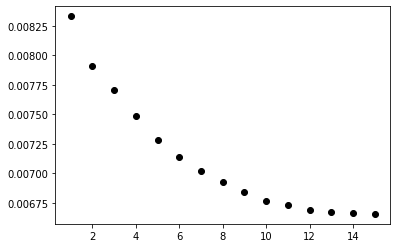

In [54]:
import matplotlib.pyplot as plt

plt.plot(depths, biases, 'o', color='black')

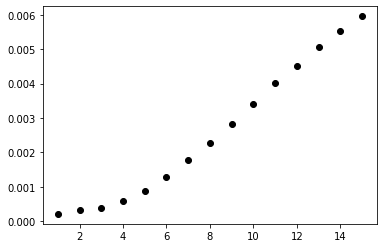

In [55]:
plt.plot(depths, variances, 'o', color='black')

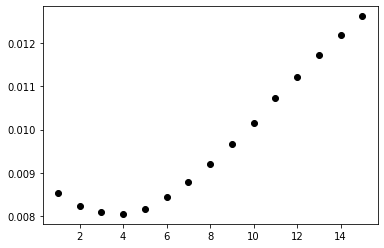

In [56]:
plt.plot(depths, errors, 'o', color='black')

**(0.5 балла) Задание 3.** Являются ли какие-то из полученных графиков монотонными? А должны ли они быть монотонными, если бы гипотетически эксперименты были проведены на всевозможных выборках? Почему? Убедитесь численно, что верно bias-variance разложение ошибки: $$error = bias^2 + variance$$

Графики Сдвига и Дисперсии монотонны. Сдвиг уменьшается, дисперсия растет: они демонстрируют правило, что с ростом сложности модели величина сдвига уменьшается, а величина дисперсии увеличивается. Поэтому, оптимизируя ошибку "берем" оптимальное количество сдвига и оптимальное количество дисперсии. Однако, как мы видим, график ошибки - выпуклая функция. Скорее всего, это связанно с тем, что error '' = bias '' + variance '' > 0.

Bias и Variance так и должны оставаться монотонными.

Уменьшение размерности и выбор функций могут уменьшить дисперсию за счет упрощения моделей. Точно так же более крупный обучающий набор имеет тенденцию уменьшать дисперсию. Добавление функций (предикторов) имеет тенденцию уменьшать смещение за счет введения дополнительной дисперсии. Алгоритмы обучения обычно имеют некоторые настраиваемые параметры, которые контролируют смещение и дисперсию; Например,

- линейные и обобщенные линейные модели могут быть регуляризованы, чтобы уменьшить их дисперсию за счет увеличения их смещения. 
- В искусственных нейронных сетях дисперсия увеличивается, а смещение уменьшается по мере увеличения количества скрытых единиц, хотя это классическое предположение было предметом недавних дебатов. Как и в GLM, обычно применяется регуляризация.
- В моделях k-ближайших соседей высокое значение k приводит к высокому смещению и низкой дисперсии (см. Ниже).
- В обучении на основе экземпляров регуляризация может быть достигнута путем варьирования смеси прототипов и образцов.
- В деревьях решений глубина дерева определяет дисперсию. Деревья решений обычно обрезаются, чтобы контролировать дисперсию.

In [57]:
for depth in depths:
    print(biases[depth - 1] + variances[depth - 1] - 1e-16 < errors[depth - 1] and errors[depth - 1] < biases[depth - 1] + variances[depth - 1] + 1e-16)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


## Композиции алгоритмов

Несмотря на описанный выше недостаток решающих деревьев, объединение их в композиции позволяет существенно улучшить качество предсказания. Рассмотрим несколько способов построения композиций.

### Bagging + RSM

![](https://sites.google.com/site/rajhansgondane2506/_/rsrc/1467898300734/publications/rrftrain.jpg?height=215&width=320)

Один из способов объединения алгоритмов в композиции — обучение каждого отдельного алгоритма на некоторой подвыборке из исходной выборки ([bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)) и подмножестве исходных признаков ([RSM](https://en.wikipedia.org/wiki/Random_subspace_method)). В sklearn этот тип композиции реализован в классе [BaggingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) (для случая регресии). Подобный подход также есть в реализации [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

### Градиентный бустинг

В случае бустинга композиция алгоритмов строится последовательно. Каждый следующий базовый алгоритм акцентируется на тех объектах, на которых обученная ранее композиция допускала ошибку.

Туториал по работе с известными реализациями градиентного бустинга XGBoost и CatBoost можно найти на вики-странице курса.

**(1 балл) Задание 4.** Проведите аналогичный эксперимент с bias-variance разложением для *градиентного бустинга*, а также для *случайного леса*, варьируя количество базовых алгоритмов (рассмотрите 1, 5, 10, 25, 50, 100 решающих деревьев).

Используйте модели градиентного бустанга XGBoost или CatBoost. Random Forest возьмите из пакета sklearn.

In [60]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [61]:
N = 5

def get_ebv_boosting(estimators):
    predict_y = []
    error = 0
    y_average = .0

    for i in range(N):
        model = xgb.XGBRegressor(
            n_estimators=estimators
        )
        model.fit(samples_X[i], samples_y[i])

        predicted = model.predict(X_test)
        predict_y.append(predicted)

        y_average += (predicted / N)
        error += MSE(predicted, y_test) / N

    variance = .0

    for i in range(N):
        variance += MSE(predict_y[i], y_average) / N

    bias_squared = MSE(y_average, y_test)
    
    print(f"get_ebv_boosting {estimators}")
    
    return error, bias_squared, variance

In [87]:
estim_count = [1, 5, 10, 25, 50, 100]
b_errors = {}
b_biases = {}
b_variances = {}

for estimators in estim_count:
    error, bias_squared, variance = get_ebv_boosting(estimators)
    
    b_errors[estimators] = error
    b_biases[estimators] = bias_squared
    b_variances[estimators] = variance

get_ebv_boosting 1
get_ebv_boosting 5
get_ebv_boosting 10
get_ebv_boosting 25
get_ebv_boosting 50
get_ebv_boosting 100


In [88]:
b_errors

{1: 0.09869680785194254,
 5: 0.012942633333190692,
 10: 0.007672043846557137,
 25: 0.007512697439695681,
 50: 0.0076311950790857305,
 100: 0.007875048792790152}

In [89]:
b_biases

{1: 0.09862499471630516,
 5: 0.012615472943729408,
 10: 0.007208479772388913,
 25: 0.006841962541402119,
 50: 0.006792995137487757,
 100: 0.006869050783704767}

In [90]:
b_variances

{1: 7.181682231021113e-05,
 5: 0.00032716044806875284,
 10: 0.00046356405946426096,
 25: 0.0006707348744384944,
 50: 0.0008381998981349171,
 100: 0.0010059980675578117}

In [85]:
N = 5

def get_ebv_forest(estimators):
    predict_y = []
    error = 0
    y_average = .0

    for i in range(N):
        model = RandomForestRegressor(n_estimators=estimators)
        model.fit(samples_X[i], samples_y[i].ravel())

        predicted = model.predict(X_test)
        predict_y.append(predicted)

        y_average += (predicted / N)
        error += MSE(predicted, y_test) / N

    variance = .0

    for i in range(N):
        variance += MSE(predict_y[i], y_average) / N

    bias_squared = MSE(y_average, y_test)
    
    print(f"get_ebv_boosting {estimators}")
    
    return error, bias_squared, variance

In [75]:
samples_y[0].shape

(5854, 1)

In [84]:
estim_count = [1, 5, 10, 25, 50, 100]
f_errors = {}
f_biases = {}
f_variances = {}

for estimators in estim_count:
    error, bias_squared, variance = get_ebv_forest(estimators)
    
    f_errors[estimators] = error
    f_biases[estimators] = bias_squared
    f_variances[estimators] = variance

get_ebv_boosting 1
get_ebv_boosting 5
get_ebv_boosting 10
get_ebv_boosting 25
get_ebv_boosting 50
get_ebv_boosting 100


**(0.5 балла) Задание 5.** Отличаются ли графики в рассмотренных моделях (градиентный бустинг, случайный лес)  между собой? На какую компоненту из разложения ошибки влияет объединение алгоритмов в рассмотренный тип композиции? Поясните свой ответ.

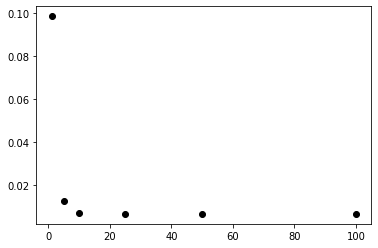

In [91]:
plt.plot(estim_count, b_biases.values(), 'o', color='black')

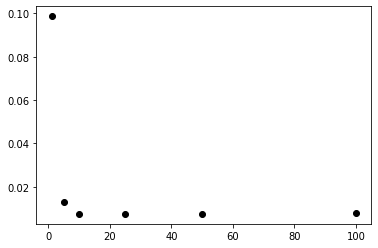

In [92]:
plt.plot(estim_count, b_errors.values(), 'o', color='black')

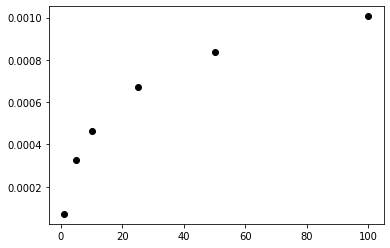

In [93]:
plt.plot(estim_count, b_variances.values(), 'o', color='black')

In [94]:
for n_est in estim_count:
    print(b_biases[n_est] + b_variances[n_est] - 1e-16 < b_errors[n_est] and 
          b_errors[n_est] < b_biases[n_est] + b_variances[n_est] + 1e-16)

False
False
False
False
False
False


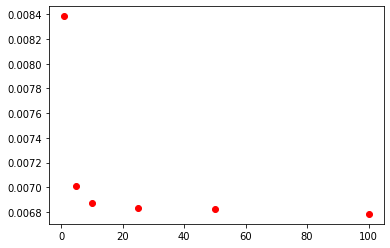

In [78]:
plt.plot(estim_count, f_biases.values(), 'o', color='red')

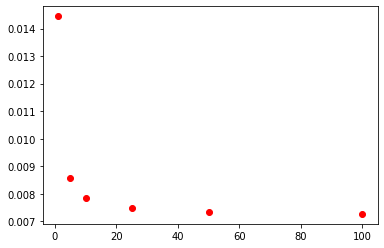

In [79]:
plt.plot(estim_count, f_errors.values(), 'o', color='red')

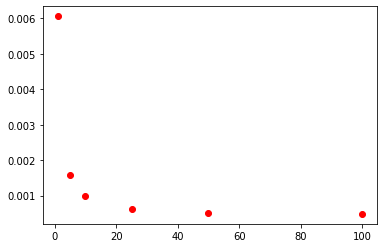

In [80]:
plt.plot(estim_count, f_variances.values(), 'o', color='red')

In [95]:
for n_est in estim_count:
    print(f_biases[n_est] + f_variances[n_est] - 1e-16 < f_errors[n_est] and 
          f_errors[n_est] < f_biases[n_est] + f_variances[n_est] + 1e-16)

True
True
True
True
True
True


Графики отличаются в компоненте дисперсии. Бустинг при объединении моделей с высоким сдвигом уменьшает в анасамбле этот сдвиг, при этом повышается дисперсия. Интересно заметить, что для случайного леса bias-variance tradeoff сохраняется, однако уменьшаются обе компоненты, и разброс, и сдвиг.

### Стекинг
![](https://4.bp.blogspot.com/-hCxAb57kzDQ/VuMgHy3hAhI/AAAAAAAAAVk/djmL9IHv5QkLWeudjE50qDoCTbiUrTetA/s1600/Stacking.jpg)

[Stacking](https://en.wikipedia.org/wiki/Ensemble_learning#Stacking) — еще один способ объединить несколько алгоритмов в один, который часто используется как в решении реальных задач из промышленной сферы, так и в конкурсах на платформах вроде Kaggle. Подход использует понятие *базовых классификаторов*, каждый из которых независимо обучается на некотором (возможно одном и том же) множестве признаков, а также *мета-классификатора*, использующего предсказания базовых классификаторов как факторы. 


**(1 балл) Задание 6.** Использование мета-классификатора подразумевает получение предсказаний от базовых классификаторов для тех объектов обучающей выборки, на которых мета-классификатор будет обучаться. В свою очередь базовые классификаторы тоже должны быть обучены на некоторой выборке. Чтобы избежать переобучения, обучающее множество делится на $n$ фолдов, $(n-1)$ из которых используются для обучения базовых классификаторов, а $n$-ый — для предсказания (вычисления значений мета-фактора).

Для получения мета-факторов для тестовых данных базовые классификаторы могут быть обучены на всем обучающем множестве, поскольку проблема переобучения здесь не возникает. Другими словами, если мы хотим посчитать факторы для тестового множества, мы можем спокойно использовать обучающее множество для тренировки базовых классификаторов. Если же мы хотим посчитать факторы для обучающего множества, то необходимо следить, чтобы классификатор не предсказывал для тех объектов, на которых обучался.

Мета-классификатор может быть обучен как на множестве исходных факторов, дополненным мета-факторами, так и исключительно на множестве мета-факторов. Выбор зависит от решаемой задачи.

Напишите функцию, которая получает на вход классификатор, обучающую и тестовые выборки, а также параметры [кросс-валидатора](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) и возвращающую значения мета-фактора для обучающего и тестового множеств.

In [ ]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv, *args, **kwargs):
    # your code here
    

**(1 балл) Задание 7.** Обучите различные известные вам модели машинного обучения и сделайте из них стекинг-композицию. 
  
  Базовые алгоритмы могут отличаться друг от друга:
    - моделью машинного обучения,
    - гиперпараметрами (например, различные функции потерь или глубины деревьев),
    - набором факторов,
    - целевой переменной: исходного целевую переменную y можно заменить на функцию от него (sqr(y), sqrt(y), log(y + 1), ...), бинаризовать по порогу ([y>y0]) или произвести другое преобразование.
  
  Обратите внимание, что бинарные мета-факторы дают меньше полезного сигнала мета-классификатору, чем числовые, поэтому базовым классификаторам лучше возвращать вероятность/числовую функцию, чем метки классов.


**(1 балл) Задание 8.** В этом задании мы попробуем обучить стекинг композицию градиентного бустинга и линейной модели на данных различной природы.

Загрузите данные по кликам (*train_clicks_information.json, test_clicks_information.json*). Используя текстовые информацию из данных о кликах, организациях, рубриках и запросах, постройте bag-of-words представление с помощью TfidfVectorizer.

После этого у вас будет два набора факторов: базовые факторы (*base*), реализованные ранее, и разреженная матрица признаков, полученная применением TfidfVectorizer'а (*tfidf*).

Обучите различные модели и замерьте качество на тестовой выборке по метрике MSE:

 1. Линейная модель на tfidf факторах;
 
 2. Линейная модель на tfidf + base факторах;

 3. Градиентный бустинг на base факторах;

 4. Градиентный бустинг на tfidf + base факторах (здесь можно сократить размерность tfidf, если данные не умещаются в памяти)
 
 5. Градиентный бустинг на base факторах + мета-факторе «предсказание модели из п.1»
 

Можете воспользоваться любой из двух реализаций градиентного бустинга: XGBoost или CatBoost.

Для тренировки tfidf модели можно использовать и обучающие, и тестовые данные, поскольку она не зависит от целевой переменной.


**(1 балл) Задание 9.**
Проанализируйте результаты, полученные в предыдущем задании. Сравните модели с точки зрения полученного качества, времени обучения и затрат по памяти.

Удалось ли улучшить качество предсказания с помощью стекинга?

Почему реализованная в п.5 стекинг композиция может работать лучше, чем градиентный бустинг, обученный на всем множестве факторов (п.4)?

Помогло ли добавление базовых факторов в линейную модель (модель из п.2 против модели из п.1)? Почему?

## Ранжирование

![](http://i.imgur.com/2QnD2nF.jpg)

Задачу поискового ранжирования можно описать следующим образом: имеется множество документов $d \in D$ и множество запросов $q \in Q$. Требуется оценить *степень релевантности* документа по отношению к запросу: $(q, d) \mapsto r$, относительно которой будет производиться ранжирование. Для восстановления этой зависимости используются методы машинного обучения. Обычно используется три типа:
 - признаки запроса $q$, например: мешок слов текста запроса, его длина, ...
 - документа $d$, например: значение PageRank, мешок слов, доменное имя, ...
 - пары $(q, d)$, например: число вхождений фразы из запроса $q$ в документе $d$, ...

Одна из отличительных особенностей задачи ранжирования от классических задач машинного обучения заключается в том, что качество результата зависит не от предсказанных оценок релевантности, а от порядка следования документов в рамках конкретного запроса, т.е. важно не абсолютное значение релевантности (его достаточно трудно формализовать в виде числа), а то, более или менее релевантен документ, относительно других документов.
### Подходы к решению задачи ранжирования
Существуют 3 основных подхода, различие между которыми в используемой функции потерь:
  
1. **Pointwise подход**. В этом случае рассматривается *один объект* (в случае поискового ранжирования - конкретный документ) и функция потерь считается только по нему. Любой стандартный классификатор или регрессор может решать pointwise задачу ранжирования, обучившись предсказывать значение таргета. Итоговое ранжирование получается после сортировки документов к одному запросу по предсказанию такой модели.
2. **Pairwise подход**. В рамках данной модели функция потерь вычисляется по *паре объектов*. Другими словами, функция потерь штрафует модель, если отражированная этой моделью пара документов оказалась в неправильном порядке.
3. **Listwise подход**. Этот подход использует все объекты для вычисления функции потерь, стараясь явно оптимизировать правильный порядок.

### Оценка качества

Для оценивания качества ранжирования найденных документов в поиске используются асессорские оценки. Само оценивание происходит на скрытых от обучения запросах $Queries$. Для этого традиционно используется метрика *DCG* ([Discounted Cumulative Gain](https://en.wikipedia.org/wiki/Discounted_cumulative_gain)) и ее нормализованный вариант — *nDCG*, всегда принимающий значения от 0 до 1.
Для одного запроса DCG считается следующим образом:
$$ DCG = \sum_{i=1}^P\frac{(2^{rel_i} - 1)}{\log_2(i+1)}, $$

где $P$ — число документов в поисковой выдаче, $rel_i$ — релевантность (асессорская оценка) документа, находящегося на i-той позиции.

*IDCG* — идеальное (наибольшее из возможных) значение *DCG*, может быть получено путем ранжирования документов по убыванию асессорских оценок.

Итоговая формула для расчета *nDCG*:

$$nDCG = \frac{DCG}{IDCG} \in [0, 1].$$

Чтобы оценить значение *nDCG* на выборке $Queries$ ($nDCG_{Queries}$) размера $N$, необходимо усреднить значение *nDCG* по всем запросам  выборки:
$$nDCG_{Queries} = \frac{1}{N}\sum_{q \in Queries}nDCG(q).$$

Пример реализации метрик ранжирование на python можно найти [здесь](https://gist.github.com/mblondel/7337391).

В рамках нашей задачи «документом» будет являться организация.

Разбейте обучающую выборку на обучение и контроль в соотношении 70 / 30. Обратите внимание, что разбивать необходимо множество запросов, а не строчки датасета.

Далее рассмотрим несколько подходов предсказания релевантности. Для оценивания качества моделей используйте метрику nDCG на контроле. В случае подбора гиперпараметров используйте кросс-валидацию по 5 блокам, где разбиение должно быть по запросам, а не строчкам датасета.

###  Ранжируем с XGBoost и CatBoost

XGBoost имеет несколько функций потерь для решения задачи ранжирования:
1. **reg:linear** — данную функцию потерь можно использовать для решения задачи ранжирование *pointwise* подходом.
2. **rank:pairwise** — в качестве *pairwise* модели в XGBoost реализован [RankNet](http://icml.cc/2015/wp-content/uploads/2015/06/icml_ranking.pdf), в котором минимизируется гладкий функционал качества ранжирования: $$ Obj = \sum_{i \prec j} \mathcal{L}\left(a(x_j) - a(x_i)\right) \rightarrow min $$ $$ \mathcal{L}(M) = log(1 + e^{-M}), $$ где $ a(x) $ - функция ранжирования. Суммирование ведется по всем парам объектов, для которых определено отношение порядка, например, для пар документов, показанных по одному запросу. Таким образом функция потерь штрафует за то, что пара объектов неправильно упорядочена.
3. **rank:map, rank:ndcg** — реализация [LambdaRank](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/MSR-TR-2010-82.pdf) для двух метрик: [MAP](https://en.wikipedia.org/wiki/Information_retrieval#Mean_average_precision) и **nDCG**. Известно, что для того, чтобы оптимизировать негладкий функционал, такой как **nDCG**,  нужно домножить градиент функционала $ Obj(a) $ на значение $\Delta NDCG_{ij} $ — изменение значения функционала качества при замене $x_i$ на $ x_j$.  Поскольку для вычисления метрик необходимы все объекты выборки, то эти две ранжирующие функции потерь являются представителями класса *listwise* моделей.

Реализованные в CatBoost ранжирующие функции потерь можной найти [здесь](https://catboost.ai/docs/concepts/loss-functions-ranking.html#groupwise-metrics).

**(2 балла) Задание 10.** Попробуйте различные функции потерь (регрессионные и ранжирующие) для моделей XGBoost и CatBoost. Настройте основные параметры моделей (глубина, кол-во деревьев, глубина, скорость обучения, регуляризация).  
Сравните построенные модели с точки зрения метрики nDCG на контроле и проанализируйте полученные результаты:
  - какая модель работает лучше всего для данной задачи? 
  - в чем достоинства/недостатки каждой? 
  - сравните модели между собой: 
   - получается ли сравнимое качество линейного pointwise подхода с остальными моделями? 
   - заметна ли разница в качестве при использовании бустинга с разными функциями потерь?

**(1 балл) Задание 11.** Одним из основных преимуществ CatBoost'a является обработка категориальных факторов «из коробки». Добавьте в датасет различные категориальные факторы из данных и обучите заново CatBoost модели. Улучшилось ли качество?

#### Пользовательская функция потерь

Библиотека XGBoost позволяет использовать пользовательские функции потерь. Для этого необходимо реализовать функцию, принимающую на вход вектор предсказанных значений и обучающую выборку, и возвращающую градиент и гессиан, посчитанный по входным данным.

Важно отметить, что XGBoost использует диагональную аппроксимацию гессиана, таким образом все недиагональные элементы считаются малозначимыми и приравниваются нулю, поэтому и градиент, и гессиан являются векторами длины размера обучающей выборки.

**(3 балла) Задание 12.** Реализуйте экспоненциальную функцию потерь для XGBoost:
$$ Obj = \sum_{i \prec j} \mathcal{L}\left(a(x_j) - a(x_i)\right) \rightarrow min $$ $$ \mathcal{L}(M) = e^{-M} $$

Обучите модель с помощью данной функции потерь, настройте параметры.

**Комментарии к реализации**

В случае ранжирования XGBoost'у необходимо знать о разбиении всех объектов на группы. В нашем случае в одну группу будут входить документы, соответствующие одному запросу. Функция, считающая градиент и гессиан по данным, должна знать данное разбиение датасета. Однако питоновский интерфейс класса *DMatrix* (в котором хранится датасет) не дает возможности получить это разбиение. В этом случае нужно реализовать функцию потерь в качестве функтора, конструктор которого принимает разбиение на группы в качестве параметра.

Пример реализации своей функции потерь можно найти на соответствующем семинаре.

In [ ]:
class ExponentialPairwiseLoss(object):
    def __init__(self, groups):
        self.groups = groups
                        
    def __call__(self, preds, dtrain):
        # your code here
        pass

**Задание 13.** С помощью наилучшей из получившихся в ходе лабораторной работы моделей сделайте предсказания для тестовой части выборки и отправьте их на kaggle. В отдельной ячейке выпишите получившийся результат (NDCG).

**Результат:**

-----------------------------------------------------------

На этом лабораторная часть задания закончена. Далее - конкурсная часть. Вы можете решать его прямо здесь или в отдельном ноутбуке. Эта часть работы проверяется только у решений, попавших в топ в лидерборде.
Если решать конкурс в отдельном ноутбуке удобнее, можете выложить его в энитаск рядом с решением лабораторной.

Удачи!

Кратко опишите, как вы добились такого результата. Расскажите, что успели попробовать и что из этого сработало.

Кроме этого, можете оставить отзыв о лабораторно-конкурсном задании :)